In [1]:
sc

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1675882034894_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-0>

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Let us make a small dataset

In [4]:
n_samples=1600
n_clusters=3
n_features =2

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
np.random.seed(24)
# Creating a n_features=2 Dim dataset with centers=3 clusters
Xs, Ys = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters)
print(Xs.shape)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(1600, 2)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

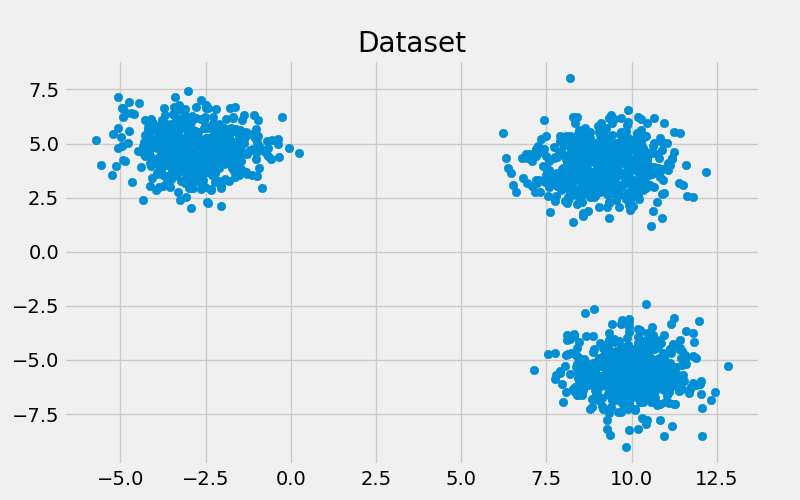

In [14]:
plt.rcParams['figure.figsize'] = (8, 5)
fig = plt.figure()

ax0 = fig.add_subplot(111)
ax0.scatter([point[0] for point in Xs], [point[1] for point in Xs])
ax0.set_title('Dataset')

%matplot plt

In [15]:
df=spark.createDataFrame(pd.DataFrame(Xs,columns=list(['x1','x2'])))
df.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------------------+
|                 x1|                 x2|
+-------------------+-------------------+
|-2.5638208798284507|  4.456735811810272|
| 10.490242243595278|-5.1535626793877345|
|-3.2685543481553845|  6.069838764259055|
| 10.435737197119435| 3.9543776746596095|
|  9.260825829214923|  4.936193706759728|
+-------------------+-------------------+
only showing top 5 rows

In [16]:
vecAssembler = VectorAssembler(inputCols=df.columns, outputCol="features")
vector_df = vecAssembler.transform(df)
vector_df.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------------------+--------------------+
|                 x1|                 x2|            features|
+-------------------+-------------------+--------------------+
|-2.5638208798284507|  4.456735811810272|[-2.5638208798284...|
| 10.490242243595278|-5.1535626793877345|[10.4902422435952...|
|-3.2685543481553845|  6.069838764259055|[-3.2685543481553...|
| 10.435737197119435| 3.9543776746596095|[10.4357371971194...|
|  9.260825829214923|  4.936193706759728|[9.26082582921492...|
+-------------------+-------------------+--------------------+
only showing top 5 rows

In [18]:
print(vector_df.take(1)[0])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(x1=-2.5638208798284507, x2=4.456735811810272, features=DenseVector([-2.5638, 4.4567]))

In [19]:
vector_df.rdd.getNumPartitions()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

16

In [20]:
kmeans = KMeans().setK(n_clusters).setSeed(1)
model = kmeans.fit(vector_df )

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
# Make predictions
predictions_df = model.transform(vector_df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
# Shows the result.
centers = model.clusterCenters()
C=np.array(centers)
print(C)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[[-2.79377942  4.7875076 ]
 [ 9.12804842  4.05095012]
 [ 9.92863983 -5.60312889]]

In [23]:
predictions_df.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------------------+--------------------+----------+
|                 x1|                 x2|            features|prediction|
+-------------------+-------------------+--------------------+----------+
|-2.5638208798284507|  4.456735811810272|[-2.5638208798284...|         0|
| 10.490242243595278|-5.1535626793877345|[10.4902422435952...|         2|
|-3.2685543481553845|  6.069838764259055|[-3.2685543481553...|         0|
| 10.435737197119435| 3.9543776746596095|[10.4357371971194...|         1|
|  9.260825829214923|  4.936193706759728|[9.26082582921492...|         1|
+-------------------+-------------------+--------------------+----------+
only showing top 5 rows

In [24]:
predictions=predictions_df.collect()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

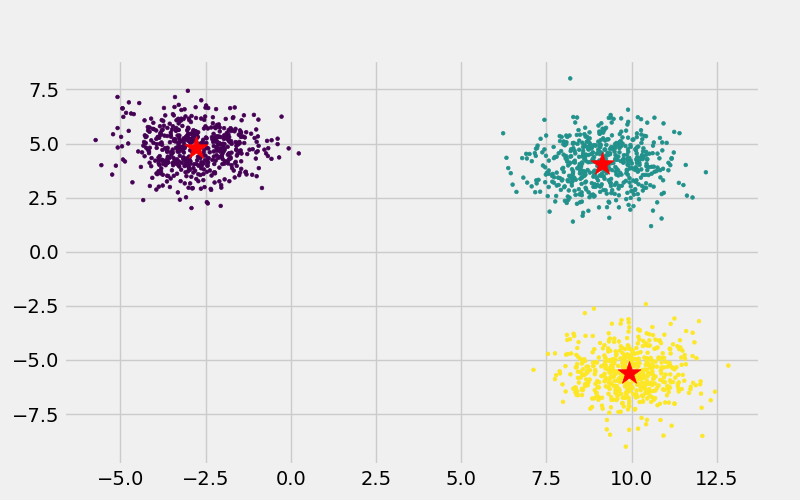

In [25]:
plt.rcParams['figure.figsize'] = (8, 5)
fig = plt.figure()

# Plotting along with the Centroids

plt.scatter([actdata['x1'] for actdata in predictions], [actdata['x2'] for actdata in predictions],c=[actdata['prediction'] for actdata in predictions], s=7)
plt.scatter(np.array(C[:,0]), np.array(C[:,1]), marker='*', s=300, c='r')

%matplot plt
